# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')


In [5]:
#Extract all rows of data
rows = soup.find_all('tr', class_="data-row")

In [6]:
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
scraped_data = []

# Loop through the scraped data to create a list of rows

for row_element in rows:
    td = row_element.find_all("td")
    row_element = [col.text for col in td]
    scraped_data.append(row_element)

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(scraped_data, columns=["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])

In [9]:
# Confirm DataFrame was created successfully
df.head(10)

id terrestrial_date sol   ls month min_temp pressure
0    2       2012-08-16  10  155     6    -75.0    739.0
1   13       2012-08-17  11  156     6    -76.0    740.0
2   24       2012-08-18  12  156     6    -76.0    741.0
3   35       2012-08-19  13  157     6    -74.0    732.0
4   46       2012-08-20  14  157     6    -74.0    740.0
5   57       2012-08-21  15  158     6    -78.0    740.0
6   68       2012-08-22  16  158     6    -77.0    740.0
7   79       2012-08-23  17  159     6    -76.0    742.0
8  112       2012-08-27  21  161     6    -74.0    741.0
9  114       2012-08-28  22  162     6    -74.0    742.0

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [11]:
# Change data types for data analysis
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])
df.sol = df.sol.astype("int")
df.ls = df.ls.astype("int")
df.month = df.month.astype("int")
df.min_temp = df.min_temp.astype("float")
df.pressure = df.pressure.astype("float")

In [12]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.3+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
df["month"].nunique()

12

In [14]:
# 2. How many Martian days' worth of data are there?
df["sol"].nunique()

1867

In [15]:
# 3. What is the average low temperature by month?
avg_low_temp = df.groupby("month")["min_temp"].mean()
avg_low_temp



month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

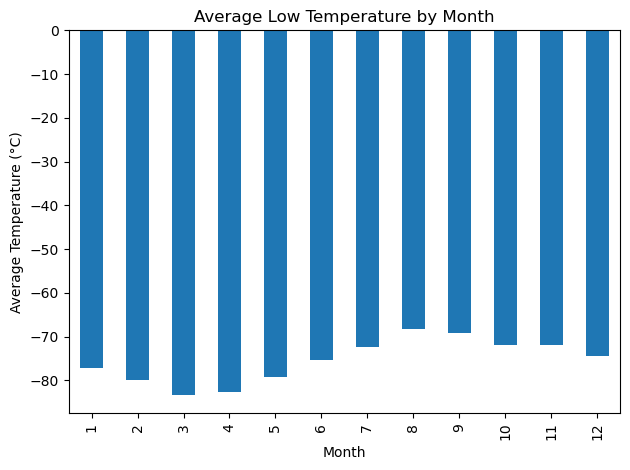

In [16]:
# Plot the average temperature by month
avg_plot = avg_low_temp.plot(kind="bar")
avg_plot.set_title("Average Low Temperature by Month")
avg_plot.set_xlabel("Month")
avg_plot.set_ylabel("Average Temperature (°C)")

plt.tight_layout()
plt.show()


In [17]:
# Identify the coldest and hottest months in Curiosity's location
avg_min_temp_df = df.groupby("month").mean().sort_values("min_temp")
avg_min_temp_df


C:\Users\Asabe Chioma\AppData\Local\Temp\ipykernel_28196\3157816626.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_min_temp_df = df.groupby("month").mean().sort_values("min_temp")


sol          ls   min_temp    pressure
month                                                
3      1204.406250   75.010417 -83.307292  877.322917
4      1244.500000  104.365979 -82.747423  806.329897
2      1175.853933   44.258427 -79.932584  889.455056
5      1182.691275  132.885906 -79.308725  748.557047
1      1077.574713   15.281609 -77.160920  862.488506
6       750.829932  164.897959 -75.299320  745.054422
12      990.951807  344.692771 -74.451807  842.156627
7       715.105634  194.894366 -72.281690  795.105634
11      947.224638  314.536232 -71.985507  857.014493
10     1034.669643  286.330357 -71.982143  887.312500
9       861.186567  254.052239 -69.171642  913.305970
8       795.333333  224.347518 -68.382979  873.829787

In [18]:
# 4. Average pressure by Martian month
avg_pressure_df = df.groupby("month").mean().sort_values("pressure")
avg_pressure_df


C:\Users\Asabe Chioma\AppData\Local\Temp\ipykernel_28196\1299742972.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_pressure_df = df.groupby("month").mean().sort_values("pressure")


sol          ls   min_temp    pressure
month                                                
6       750.829932  164.897959 -75.299320  745.054422
5      1182.691275  132.885906 -79.308725  748.557047
7       715.105634  194.894366 -72.281690  795.105634
4      1244.500000  104.365979 -82.747423  806.329897
12      990.951807  344.692771 -74.451807  842.156627
11      947.224638  314.536232 -71.985507  857.014493
1      1077.574713   15.281609 -77.160920  862.488506
8       795.333333  224.347518 -68.382979  873.829787
3      1204.406250   75.010417 -83.307292  877.322917
10     1034.669643  286.330357 -71.982143  887.312500
2      1175.853933   44.258427 -79.932584  889.455056
9       861.186567  254.052239 -69.171642  913.305970

C:\Users\Asabe Chioma\AppData\Local\Temp\ipykernel_28196\2268656626.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_pressure = pd.DataFrame(df.groupby("month").mean()["pressure"])


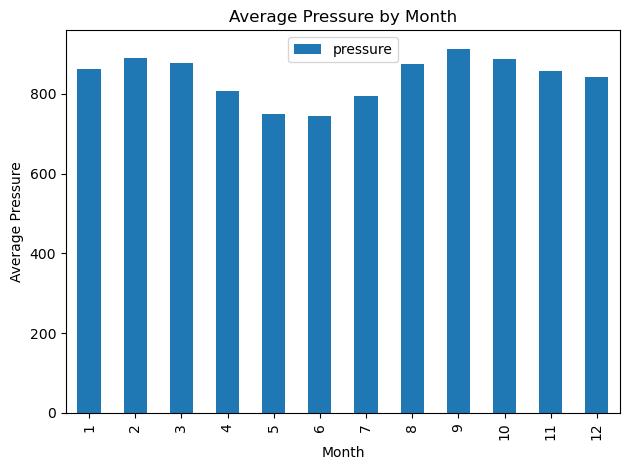

In [19]:
# Plot the average pressure by month
avg_pressure = pd.DataFrame(df.groupby("month").mean()["pressure"])

pres_plot = avg_pressure.plot(kind="bar")
pres_plot.set_title("Average Pressure by Month")
pres_plot.set_xlabel("Month")
pres_plot.set_ylabel("Average Pressure")
plt.tight_layout()

plt.show()

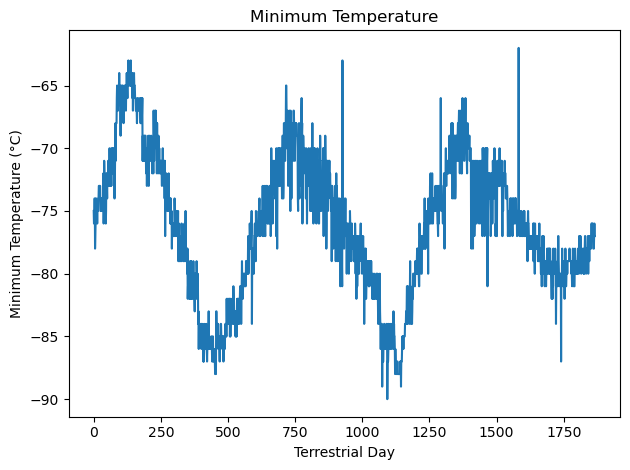

<Figure size 640x480 with 0 Axes>

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plot_days = df.min_temp.plot()
plot_days.set_title("Minimum Temperature")
plot_days.set_xlabel("Terrestrial Day")
plot_days.set_ylabel("Minimum Temperature (°C)")
plt.tight_layout()

plt.show()



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
df.to_csv("mars_weather.csv", header=True, index=False, date_format="%Y-%m-%d")

In [22]:
browser.quit()